# Library / Packages

In [1]:
# 
import pandas as pd
import numpy as np
from automate import auto_preparation, auto_statistic, auto_preprocessing

# 
from dotenv import dotenv_values

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

# Sampling Data

Jika data berada pada dataset atau database terpisah maka lakukan merging terlebih dahulu, berikut merupakan data sintetis yang sudah melalu proses merging data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Jumlah sampel yang diinginkan
num_samples = 100000

# Definisi lokasi (kota, negara bagian, kode pos)
locations = [
    ("New York", "NY", 10001),
    ("Los Angeles", "CA", 90001),
    ("Chicago", "IL", 60601),
    ("Houston", "TX", 77001),
    ("Phoenix", "AZ", 85001),
    ("Philadelphia", "PA", 19101),
    ("San Antonio", "TX", 78201),
    ("San Diego", "CA", 92101),
    ("Dallas", "TX", 75201),
    ("San Jose", "CA", 95101)
]

# Generate data sintetis
df_synthetic = pd.DataFrame({
    "credit_card": np.random.randint(10**15, 10**16, num_samples, dtype=np.int64),
    "datetime": np.random.choice(pd.date_range("2015-01-01", "2016-12-31", freq="min"), num_samples),
    "transaction_dollar_amount": np.round(np.random.uniform(5, 500, num_samples), 2),
    "long": np.round(np.random.uniform(-125, -65, num_samples), 6),
    "lat": np.round(np.random.uniform(25, 50, num_samples), 6),
})

# Pilih lokasi secara acak
selected_indices = np.random.randint(0, len(locations), num_samples)
df_synthetic["city"] = [locations[i][0] for i in selected_indices]
df_synthetic["state"] = [locations[i][1] for i in selected_indices]
df_synthetic["zipcode"] = [locations[i][2] for i in selected_indices]

# Generate limit kartu kredit
df_synthetic["credit_card_limit"] = np.random.choice([5000, 10000, 15000, 20000, 25000, 30000], num_samples)

# Tampilkan hasil
df_synthetic.head()

,credit_card,datetime,transaction_dollar_amount,long,lat,city,state,zipcode,credit_card_limit
0,8455019561938766,2015-04-30 15:49:00,92.57,-120.667842,34.186452,New York,NY,10001,25000
1,4453529814454906,2016-01-25 13:25:00,357.51,-105.251708,40.567770,Phoenix,AZ,85001,5000
2,5287414261838073,2015-09-03 18:07:00,215.25,-104.878073,31.757090,Philadelphia,PA,19101,30000
3,7639296793055773,2015-11-01 07:55:00,235.24,-123.682437,39.548106,New York,NY,10001,20000
4,4411469026776890,2016-09-29 05:02:00,417.84,-73.319358,46.885542,Phoenix,AZ,85001,10000


# Data Preparation

In [5]:
# Terapkan proses data
df_prepare = auto_preparation.preprocess_credit_card_data(df_synthetic)

Missing values before processing:
credit_card                  0
datetime                     0
transaction_dollar_amount    0
long                         0
lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

Total duplicate data before processing: 0
Total duplicate transactions: 0

Fraud cases percentage:
fraud
not_fraud    95.0
fraud         5.0
Name: proportion, dtype: float64

Fraud cases count:
fraud
not_fraud    95000
fraud         5000
Name: count, dtype: int64


In [6]:
df_prepare.head()

,credit_card,datetime,transaction_dollar_amount,long,lat,city,state,zipcode,credit_card_limit,date,year,month,quarter,day,time,week_cat,season,limit_cat,transaction_count,prev_time,time_diff_hour,prev_long,prev_lat,distance_km,geo_cat,speed_km/h,fraud
0,8455019561938766,2015-04-30 15:49:00,92.57,-120.667842,34.186452,new york,ny,10001,25000,2015-04-30,2015,april,2015Q2,thursday,15:49:00,weekday,spring,medium,1.0,2015-04-30 15:49:00,0.0,0.0,0.0,12793.374691,anomaly,0.0,not_fraud
1,4453529814454906,2016-01-25 13:25:00,357.51,-105.251708,40.567770,phoenix,az,85001,5000,2016-01-25,2016,january,2016Q1,monday,13:25:00,weekday,winter,very_low,1.0,2016-01-25 13:25:00,0.0,0.0,0.0,11296.381426,anomaly,0.0,not_fraud
2,5287414261838073,2015-09-03 18:07:00,215.25,-104.878073,31.757090,philadelphia,pa,19101,30000,2015-09-03,2015,september,2015Q3,thursday,18:07:00,weekday,fall,high,1.0,2015-09-03 18:07:00,0.0,0.0,0.0,11418.985652,anomaly,0.0,not_fraud
3,7639296793055773,2015-11-01 07:55:00,235.24,-123.682437,39.548106,new york,ny,10001,20000,2015-11-01,2015,november,2015Q4,sunday,07:55:00,weekend,fall,medium,1.0,2015-11-01 07:55:00,0.0,0.0,0.0,12832.606649,anomaly,0.0,not_fraud
4,4411469026776890,2016-09-29 05:02:00,417.84,-73.319358,46.885542,phoenix,az,85001,10000,2016-09-29,2016,september,2016Q3,thursday,05:02:00,weekday,fall,low,1.0,2016-09-29 05:02:00,0.0,0.0,0.0,8747.811121,anomaly,0.0,not_fraud


# Data Statistics

In [7]:
# Terapkan proses data
df_stats = auto_statistic.analyze_numeric_features(df_prepare)

===== Uji Normalitas Data =====

Kolom dengan distribusi normal: []
Kolom dengan distribusi tidak normal: ['transaction_dollar_amount', 'credit_card_limit', 'transaction_count', 'time_diff_hour', 'prev_long', 'prev_lat', 'distance_km', 'speed_km/h']
-------------------------------------------------- 

===== Uji Homogenitas Varians =====
Column transaction_dollar_amount: 	Varians antar kelompok homogen
Column credit_card_limit: 	Varians antar kelompok homogen
Column transaction_count: 	Varians antar kelompok homogen
Column time_diff_hour: 	Varians antar kelompok homogen
Column prev_long: 	Varians antar kelompok homogen
Column prev_lat: 	Varians antar kelompok homogen
Column distance_km: 	Varians antar kelompok homogen
Column speed_km/h: 	Varians antar kelompok homogen
-------------------------------------------------- 

===== Uji Perbandingan Rata-rata =====
Column transaction_dollar_amount: 	Tidak ada perbedaan signifikan
Column credit_card_limit: 	Tidak ada perbedaan signifikan
Column

# Data Preprocessing

In [8]:
df_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                100000 non-null  int64         
 1   datetime                   100000 non-null  datetime64[ns]
 2   transaction_dollar_amount  100000 non-null  float64       
 3   long                       100000 non-null  float64       
 4   lat                        100000 non-null  float64       
 5   city                       100000 non-null  object        
 6   state                      100000 non-null  object        
 7   zipcode                    100000 non-null  int64         
 8   credit_card_limit          100000 non-null  int32         
 9   date                       100000 non-null  object        
 10  year                       100000 non-null  int32         
 11  month                      100000 non-null  object   

In [9]:
# checiking numeric columns
sample = df_prepare.select_dtypes(include = ['number'])
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                100000 non-null  int64  
 1   transaction_dollar_amount  100000 non-null  float64
 2   long                       100000 non-null  float64
 3   lat                        100000 non-null  float64
 4   zipcode                    100000 non-null  int64  
 5   credit_card_limit          100000 non-null  int32  
 6   year                       100000 non-null  int32  
 7   transaction_count          100000 non-null  float64
 8   time_diff_hour             100000 non-null  float64
 9   prev_long                  100000 non-null  float64
 10  prev_lat                   100000 non-null  float64
 11  distance_km                100000 non-null  float64
 12  speed_km/h                 100000 non-null  float64
dtypes: float64(9), int32(2), int64

Index(['transaction_dollar_amount', 'credit_card_limit', 'time_diff_hour',
       'distance_km', 'speed_km/h'],
      dtype='object')
Valid columns after variance filtering: ['transaction_dollar_amount', 'credit_card_limit', 'distance_km']
Skewness before transformation:
 transaction_dollar_amount    0.005602
credit_card_limit            0.000857
distance_km                  0.006341
dtype: float64 

Kurtosis before transformation:
 transaction_dollar_amount   -1.195620
credit_card_limit           -1.270717
distance_km                 -1.139475
dtype: float64 

No columns need transformation.


<Figure size 1500x1000 with 0 Axes>

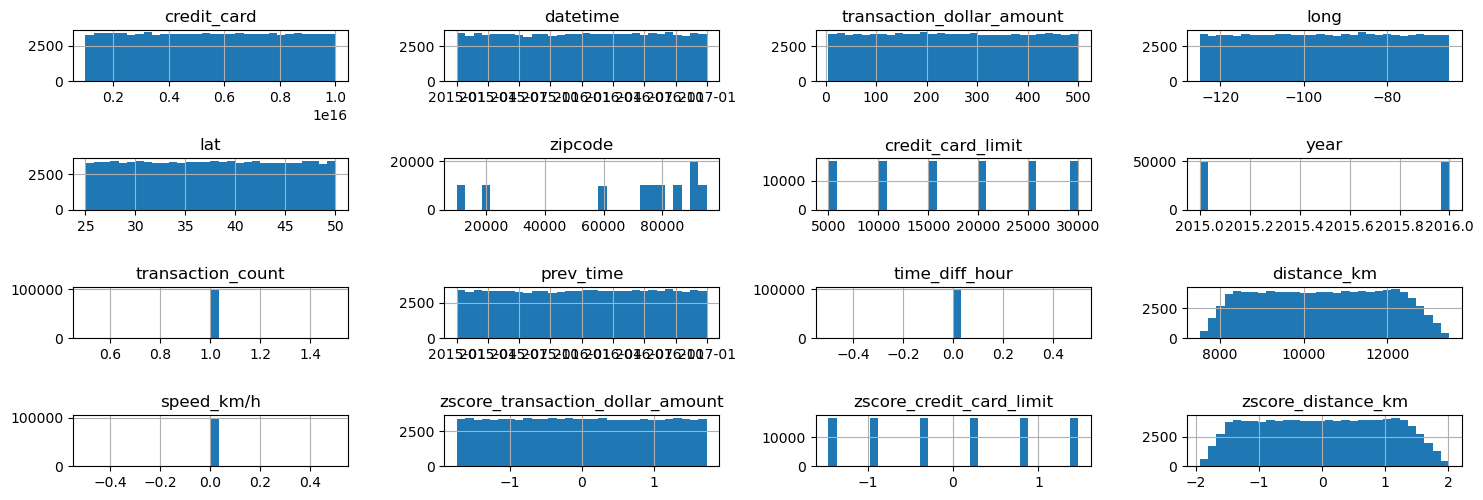

In [10]:
df_process = auto_preprocessing.preprocess_data(df_prepare)

In [11]:
df_process.columns

Index(['credit_card', 'datetime', 'transaction_dollar_amount', 'long', 'lat',
       'city', 'state', 'zipcode', 'credit_card_limit', 'date', 'year',
       'month', 'quarter', 'day', 'time', 'week_cat', 'season', 'limit_cat',
       'transaction_count', 'prev_time', 'time_diff_hour', 'distance_km',
       'geo_cat', 'speed_km/h', 'fraud', 'zscore_transaction_dollar_amount',
       'zscore_credit_card_limit', 'zscore_distance_km'],
      dtype='object')